In [2]:
#Installation of the library
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 5.2MB/s 
     |████████████████████████████████| 266kB 18.5MB/s 
     |████████████████████████████████| 358kB 18.6MB/s 
     |████████████████████████████████| 143kB 24.9MB/s 
     |████████████████████████████████| 296kB 18.8MB/s 
     |████████████████████████████████| 296kB 25.8MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=942c8dd15ccd19cef6e79f19beaa022b4aaa8dfde1028836d9a8ae970098171e
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=1597

In [3]:
import nest_asyncio
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

In [4]:
#Now we want to scrape hashtage 
#for me i used #Covid19

import twint

c = twint.Config()
c.Limit = 3000
c.Search = '#Covid19'
c.Pandas = True

twint.run.Search(c)

Tweets_hashtags_df = twint.storage.panda.Tweets_df

1397460796163059713 2021-05-26 07:53:12 +0000 <blackwidow_fan> @HemantSorenJMM ji  @JharkhandCMO r u  wasting vaccines to give free Kafans too ppl or u r giving free Kafan is this why u r wasting vaccines.  Anyways What a visionary.   #COVID19Vaccine  #COVID19
1397460795831857154 2021-05-26 07:53:11 +0000 <NewsDigestWeb> 【北海道で新たに13人の死亡者】  北海道+13（合計1038人）  詳細は下記URLより：  https://t.co/oEslL3ucOx  #新型コロナウイルス #COVID19  https://t.co/3RtuijrGBR
1397460782686765060 2021-05-26 07:53:08 +0000 <AnkitsharmaINC> #WaiveGstLateFee  #GSTLateFees500 #Gstlatefeescap500 #GSTAmnestywithITC   #COVID19 #COVIDSecondWaveInIndia @PMOIndia @narendramodi @nsitharaman @nsitharamanoffc @GST_Council @CAITIndia @gsthelpline @askGST_GoI @cbic_india
1397460781386682369 2021-05-26 07:53:08 +0000 <AnnGuilbert4> Avant le #COVID19 le marché de l'#événementiel était plus qu'en hausse ! En 2019 en France c'était : - 34 milliards d'€ de retombées économiques - 90 millions de touristes - 455 000 emplois  - + 1,5% de hausse par

In [5]:
#Get dataSet Info
Tweets_hashtags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3095 non-null   object 
 1   conversation_id  3095 non-null   object 
 2   created_at       3095 non-null   float64
 3   date             3095 non-null   object 
 4   timezone         3095 non-null   object 
 5   place            3095 non-null   object 
 6   tweet            3095 non-null   object 
 7   language         3095 non-null   object 
 8   hashtags         3095 non-null   object 
 9   cashtags         3095 non-null   object 
 10  user_id          3095 non-null   int64  
 11  user_id_str      3095 non-null   object 
 12  username         3095 non-null   object 
 13  name             3095 non-null   object 
 14  day              3095 non-null   int64  
 15  hour             3095 non-null   object 
 16  link             3095 non-null   object 
 17  urls          

In [6]:
#here i want to describe dataSet
Tweets_hashtags_df.describe()

,created_at,user_id,day,video,nlikes,nreplies,nretweets
count,3.095000e+03,3.095000e+03,3095.0,3095.000000,3095.000000,3095.000000,3095.000000
mean,1.622014e+12,5.230667e+17,3.0,0.412924,5.251373,0.368659,4.388691
std,1.182169e+06,5.836904e+17,0.0,0.492439,74.139473,2.876827,131.456504
min,1.622011e+12,6.542030e+05,3.0,0.000000,0.000000,0.000000,0.000000
25%,1.622013e+12,3.313840e+08,3.0,0.000000,0.000000,0.000000,0.000000
50%,1.622014e+12,3.123221e+09,3.0,0.000000,0.000000,0.000000,0.000000
75%,1.622015e+12,1.148442e+18,3.0,1.000000,1.000000,0.000000,1.000000
max,1.622016e+12,1.397448e+18,3.0,1.000000,3589.000000,94.000000,6805.000000


In [7]:
#I want to get the number of element 
Tweets_hashtags_df.shape

(3095, 38)

In [8]:
#Select Columns  that i want 
tweets_hash_final = Tweets_hashtags_df[['user_id','reply_to','tweet','hour']]
tweets_hash_final.iloc[5]

user_id                                              81599451
reply_to    [{'screen_name': 'bodhisattvahana', 'name': 'b...
tweet       @bodhisattvahana PRE...MAINS..aur LIFE of #UPS...
hour                                                       07
Name: 5, dtype: object

In [9]:
# Here we want to create a list 

listPairHash =list()

for row in tweets_hash_final.iterrows():
  if len(tweets_hash_final.iloc[row[0],1])>0:
      for dic in tweets_hash_final.iloc[row[0],1]:
        for key in dic:
             if key =='id':
              new_val = tweets_hash_final.iloc[row[0],0], dic[key]
              listPairHash.append(new_val)

In [10]:
import pandas as pd

dfPair_tweets_hash = pd.DataFrame.from_records(listPairHash, columns=['from_user', 'to_user'])

In [11]:
dfPair_tweets_hash.duplicated(['from_user', 'to_user'], keep=False)

0      False
1      False
2      False
3       True
4       True
       ...  
559    False
560    False
561    False
562    False
563    False
Length: 564, dtype: bool

In [12]:
datafreqHash = dfPair_tweets_hash.groupby(['from_user', 'to_user']).size().reset_index()
datafreqHash.columns = ['from_user', 'to_user', 'freq']

In [13]:
## And now we will scrape any tweet for a specific User 

import twint

c = twint.Config()
c.Limit = 200
c.Username = 'Hannah_Bananaz'
c.Pandas = True

twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df

1397460870804893698 2021-05-26 07:53:29 +0000 <Hannah_Bananaz> @GillPowell4 @teririch Not on this topic. #CCPVirus
1397459413888241664 2021-05-26 07:47:42 +0000 <Hannah_Bananaz> @LlDutch @UnseenShreds Ooh. My life as an eternal muse is over.
1397449424154992642 2021-05-26 07:08:00 +0000 <Hannah_Bananaz> @threadreaderapp @pdfmakerapp Will do!
1397449313278599172 2021-05-26 07:07:34 +0000 <Hannah_Bananaz> @threadreaderapp @greg_scott84 Merci. Thanks for the unroll love.
1397449150447296515 2021-05-26 07:06:55 +0000 <Hannah_Bananaz> @threadreaderapp Thank you.
1397449047930114048 2021-05-26 07:06:31 +0000 <Hannah_Bananaz> @threadreaderapp Salam. Thank you.
1397448764894289924 2021-05-26 07:05:23 +0000 <Hannah_Bananaz> @DrewHolden360 Unroll please. @threadreaderapp
1397448627426004992 2021-05-26 07:04:50 +0000 <Hannah_Bananaz> @greg_scott84 Unroll please. @threadreaderapp
1397448433506537475 2021-05-26 07:04:04 +0000 <Hannah_Bananaz>  https://t.co/IysXg1DmfN
1397447839853154308 2021-05-26 

In [14]:
Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [15]:
tweets_reply = Tweets_df[['user_id','reply_to','tweet','date']]
tweets_reply.iloc[2,1]

[{'id': '895814938995957760',
  'name': 'Thread Reader App',
  'screen_name': 'threadreaderapp'},
 {'id': '804392419009576960',
  'name': 'PDFMakerApp',
  'screen_name': 'pdfmakerapp'}]

In [16]:
# And Now Cleaning data 

listPair =list()

for row in tweets_reply.iterrows():
  if len(tweets_reply.iloc[row[0],1])>0:
      for dic in tweets_reply.iloc[row[0],1]:
        for key in dic:
             if key =='id':
              new_val = tweets_reply.iloc[row[0],0], dic[key], tweets_reply.iloc[row[0],2],tweets_reply.iloc[row[0],3]
              listPair.append(new_val)


In [17]:
import pandas as pd

dfPair_tweets = pd.DataFrame.from_records(listPair, columns=['tweet_from', 'tweet_to', 'full_text', 'created_at'])

In [18]:
dfPair_tweets.head()

,tweet_from,tweet_to,full_text,created_at
0,1314418472399462400,839946872835866624,@GillPowell4 @teririch Not on this topic. #CCP...,2021-05-26 07:53:29
1,1314418472399462400,21927175,@GillPowell4 @teririch Not on this topic. #CCP...,2021-05-26 07:53:29
2,1314418472399462400,1194462235260805120,@LlDutch @UnseenShreds Ooh. My life as an eter...,2021-05-26 07:47:42
3,1314418472399462400,26778811,@LlDutch @UnseenShreds Ooh. My life as an eter...,2021-05-26 07:47:42
4,1314418472399462400,895814938995957760,@threadreaderapp @pdfmakerapp Will do!,2021-05-26 07:08:00


In [20]:
#Now we will create network 
import networkx as nx


In [21]:
g_tw = nx.from_pandas_edgelist(dfPair_tweets, source='tweet_from', target='tweet_to', edge_attr=True, create_using=nx.Graph())

In [22]:
print(nx.info(g_tw))

Name: 
Type: Graph
Number of nodes: 177
Number of edges: 176
Average degree:   1.9887


In [23]:
# we cant create also a list of author twwet + id of userid replyed
tweets_conv = Tweets_df[['username','reply_to','tweet','date']]
tweets_conv.iloc[0,1]
listPair_users =list()

for row in tweets_conv.iterrows():
  if len(tweets_conv.iloc[row[0],1])>0:
      for dic in tweets_conv.iloc[row[0],1]:
        for key in dic:
             if key =='screen_name':
              new_val = tweets_conv.iloc[row[0],0], dic[key]
              listPair_users.append(new_val)

In [24]:
len(listPair_users)

451

In [25]:
dfPair_users = pd.DataFrame.from_records(listPair_users, columns=['from_user', 'to_user'])

In [26]:
dfPair_users.head()

,from_user,to_user
0,Hannah_Bananaz,GillPowell4
1,Hannah_Bananaz,teririch
2,Hannah_Bananaz,LlDutch
3,Hannah_Bananaz,UnseenShreds
4,Hannah_Bananaz,threadreaderapp


In [27]:
dfPair_users.duplicated(['from_user', 'to_user'], keep=False)

0      False
1      False
2      False
3      False
4       True
       ...  
446     True
447    False
448     True
449     True
450     True
Length: 451, dtype: bool

In [28]:
datafreq = dfPair_users.groupby(['from_user', 'to_user']).size().reset_index()

In [29]:
datafreq.columns = ['from_user', 'to_user', 'freq']

In [30]:
datafreq

,from_user,to_user,freq
0,Hannah_Bananaz,19828384,2
1,Hannah_Bananaz,222Minutes,1
2,Hannah_Bananaz,2Duefer,1
3,Hannah_Bananaz,2VPStince,1
4,Hannah_Bananaz,55_highlander,1
...,...,...,...
171,Hannah_Bananaz,valleygirldeb3,2
172,Hannah_Bananaz,weciv01,1
173,Hannah_Bananaz,westmusk,1
174,Hannah_Bananaz,yellowsnow9,1


In [31]:
datafreq.sort_values('freq', ascending=False).head(20)

,from_user,to_user,freq
63,Hannah_Bananaz,JustinTrudeau,31
127,Hannah_Bananaz,bigmothufacking,19
81,Hannah_Bananaz,Myway51,17
47,Hannah_Bananaz,ElliottArcand64,16
117,Hannah_Bananaz,Tyler52943242,16
145,Hannah_Bananaz,kinsellawarren,15
168,Hannah_Bananaz,theJagmeetSingh,14
79,Hannah_Bananaz,MyTwistedMind89,14
163,Hannah_Bananaz,sunlorrie,13
9,Hannah_Bananaz,AlbWIPA,10


In [32]:

import networkx as nx

g = nx.from_pandas_edgelist(datafreq, source='from_user', target='to_user', edge_attr='freq', create_using=nx.DiGraph())
g_tw_hash = nx.from_pandas_edgelist(datafreqHash, source='from_user', target='to_user', edge_attr='freq',  create_using=nx.Graph())

In [33]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 177
Number of edges: 176
Average in degree:   0.9944
Average out degree:   0.9944


In [34]:
print(nx.info(g_tw_hash))

Name: 
Type: Graph
Number of nodes: 615
Number of edges: 495
Average degree:   1.6098


In [36]:
# Create a layout for our graph
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
layout = nx.spring_layout(g)

In [38]:
layout

{'19828384': array([-0.84246962, -0.34214602]),
 '222Minutes': array([0.07232187, 0.93302472]),
 '2Duefer': array([0.05202368, 0.98563118]),
 '2VPStince': array([-0.09510506,  0.93688919]),
 '55_highlander': array([ 0.7925233 , -0.29821145]),
 '6079xSmithxW': array([0.84294984, 0.51667718]),
 '6lisab2': array([-0.95061871,  0.03143634]),
 'AbBillG': array([-0.29770126, -0.89706343]),
 'Advangils3': array([0.26724213, 0.96710423]),
 'AlbWIPA': array([-0.12000826,  0.96530526]),
 'Alberta87846145': array([0.70876991, 0.64188454]),
 'AnitaOakville': array([-0.7100222 , -0.70926091]),
 'AnnieOnARampage': array([-0.72528107,  0.7141574 ]),
 'AshleyN54016441': array([-0.89479505,  0.28123461]),
 'BBICON': array([0.26187184, 0.86703123]),
 'BMadigin': array([ 0.76728823, -0.60408825]),
 'B_Caddiguy': array([-0.22535906, -0.8694963 ]),
 'Bella22537764': array([-0.57961444, -0.80115684]),
 'BeyondContesta1': array([0.9693233 , 0.13449443]),
 'BlondiesPup': array([0.00378854, 0.95367339]),
 'Bri

In [39]:
weights = [g[u][v]['freq'] for u,v in g.edges()]
weights_hash = [g_tw_hash[u][v]['freq'] for u,v in g_tw_hash.edges()]

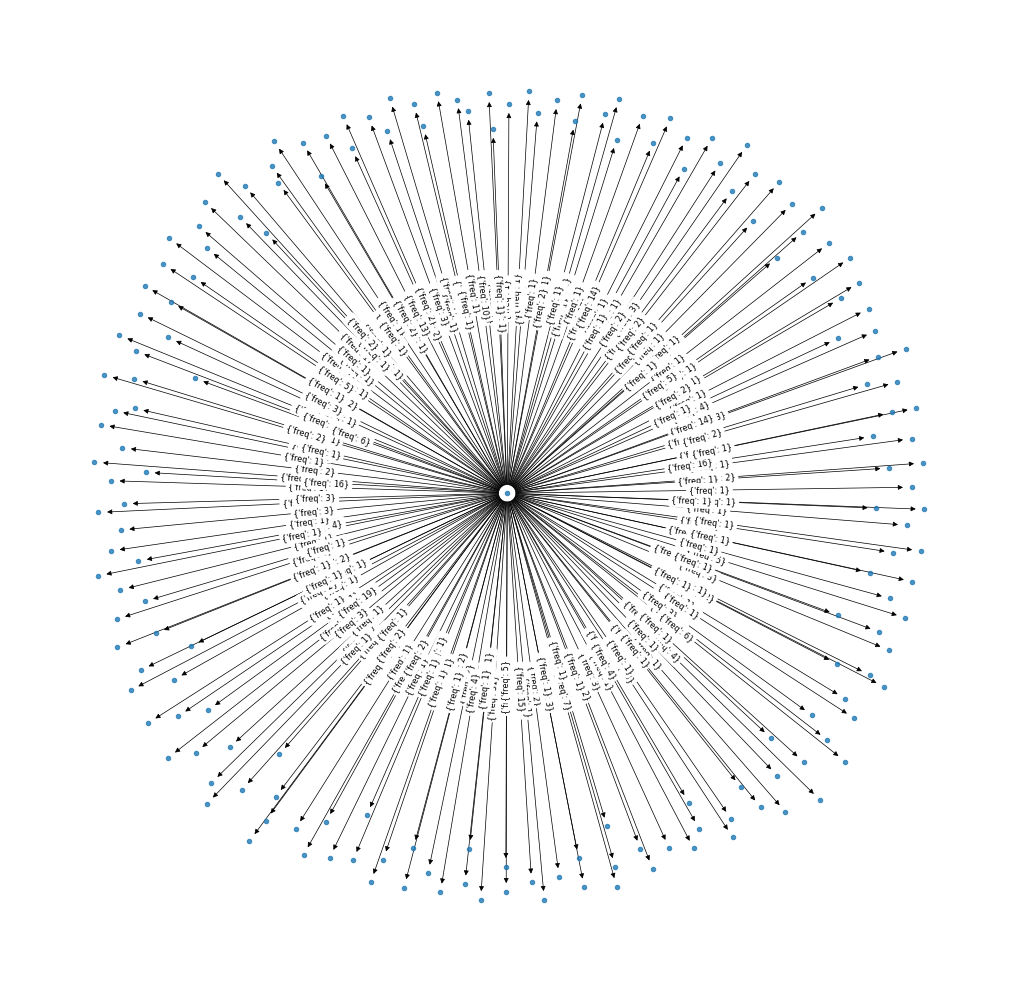

In [40]:
plt.figure(figsize = (18,18))
plt.axis('off')
nx.draw_networkx_nodes(g, pos = layout, node_size=20, alpha=0.8)
nx.draw_networkx_edges(g, pos = layout, width = 0.7, edge_color='black')
edge_labels = nx.get_edge_attributes(g, 'freq')
nx.draw_networkx_edge_labels(g, pos = layout, font_size=8)

plt.show()

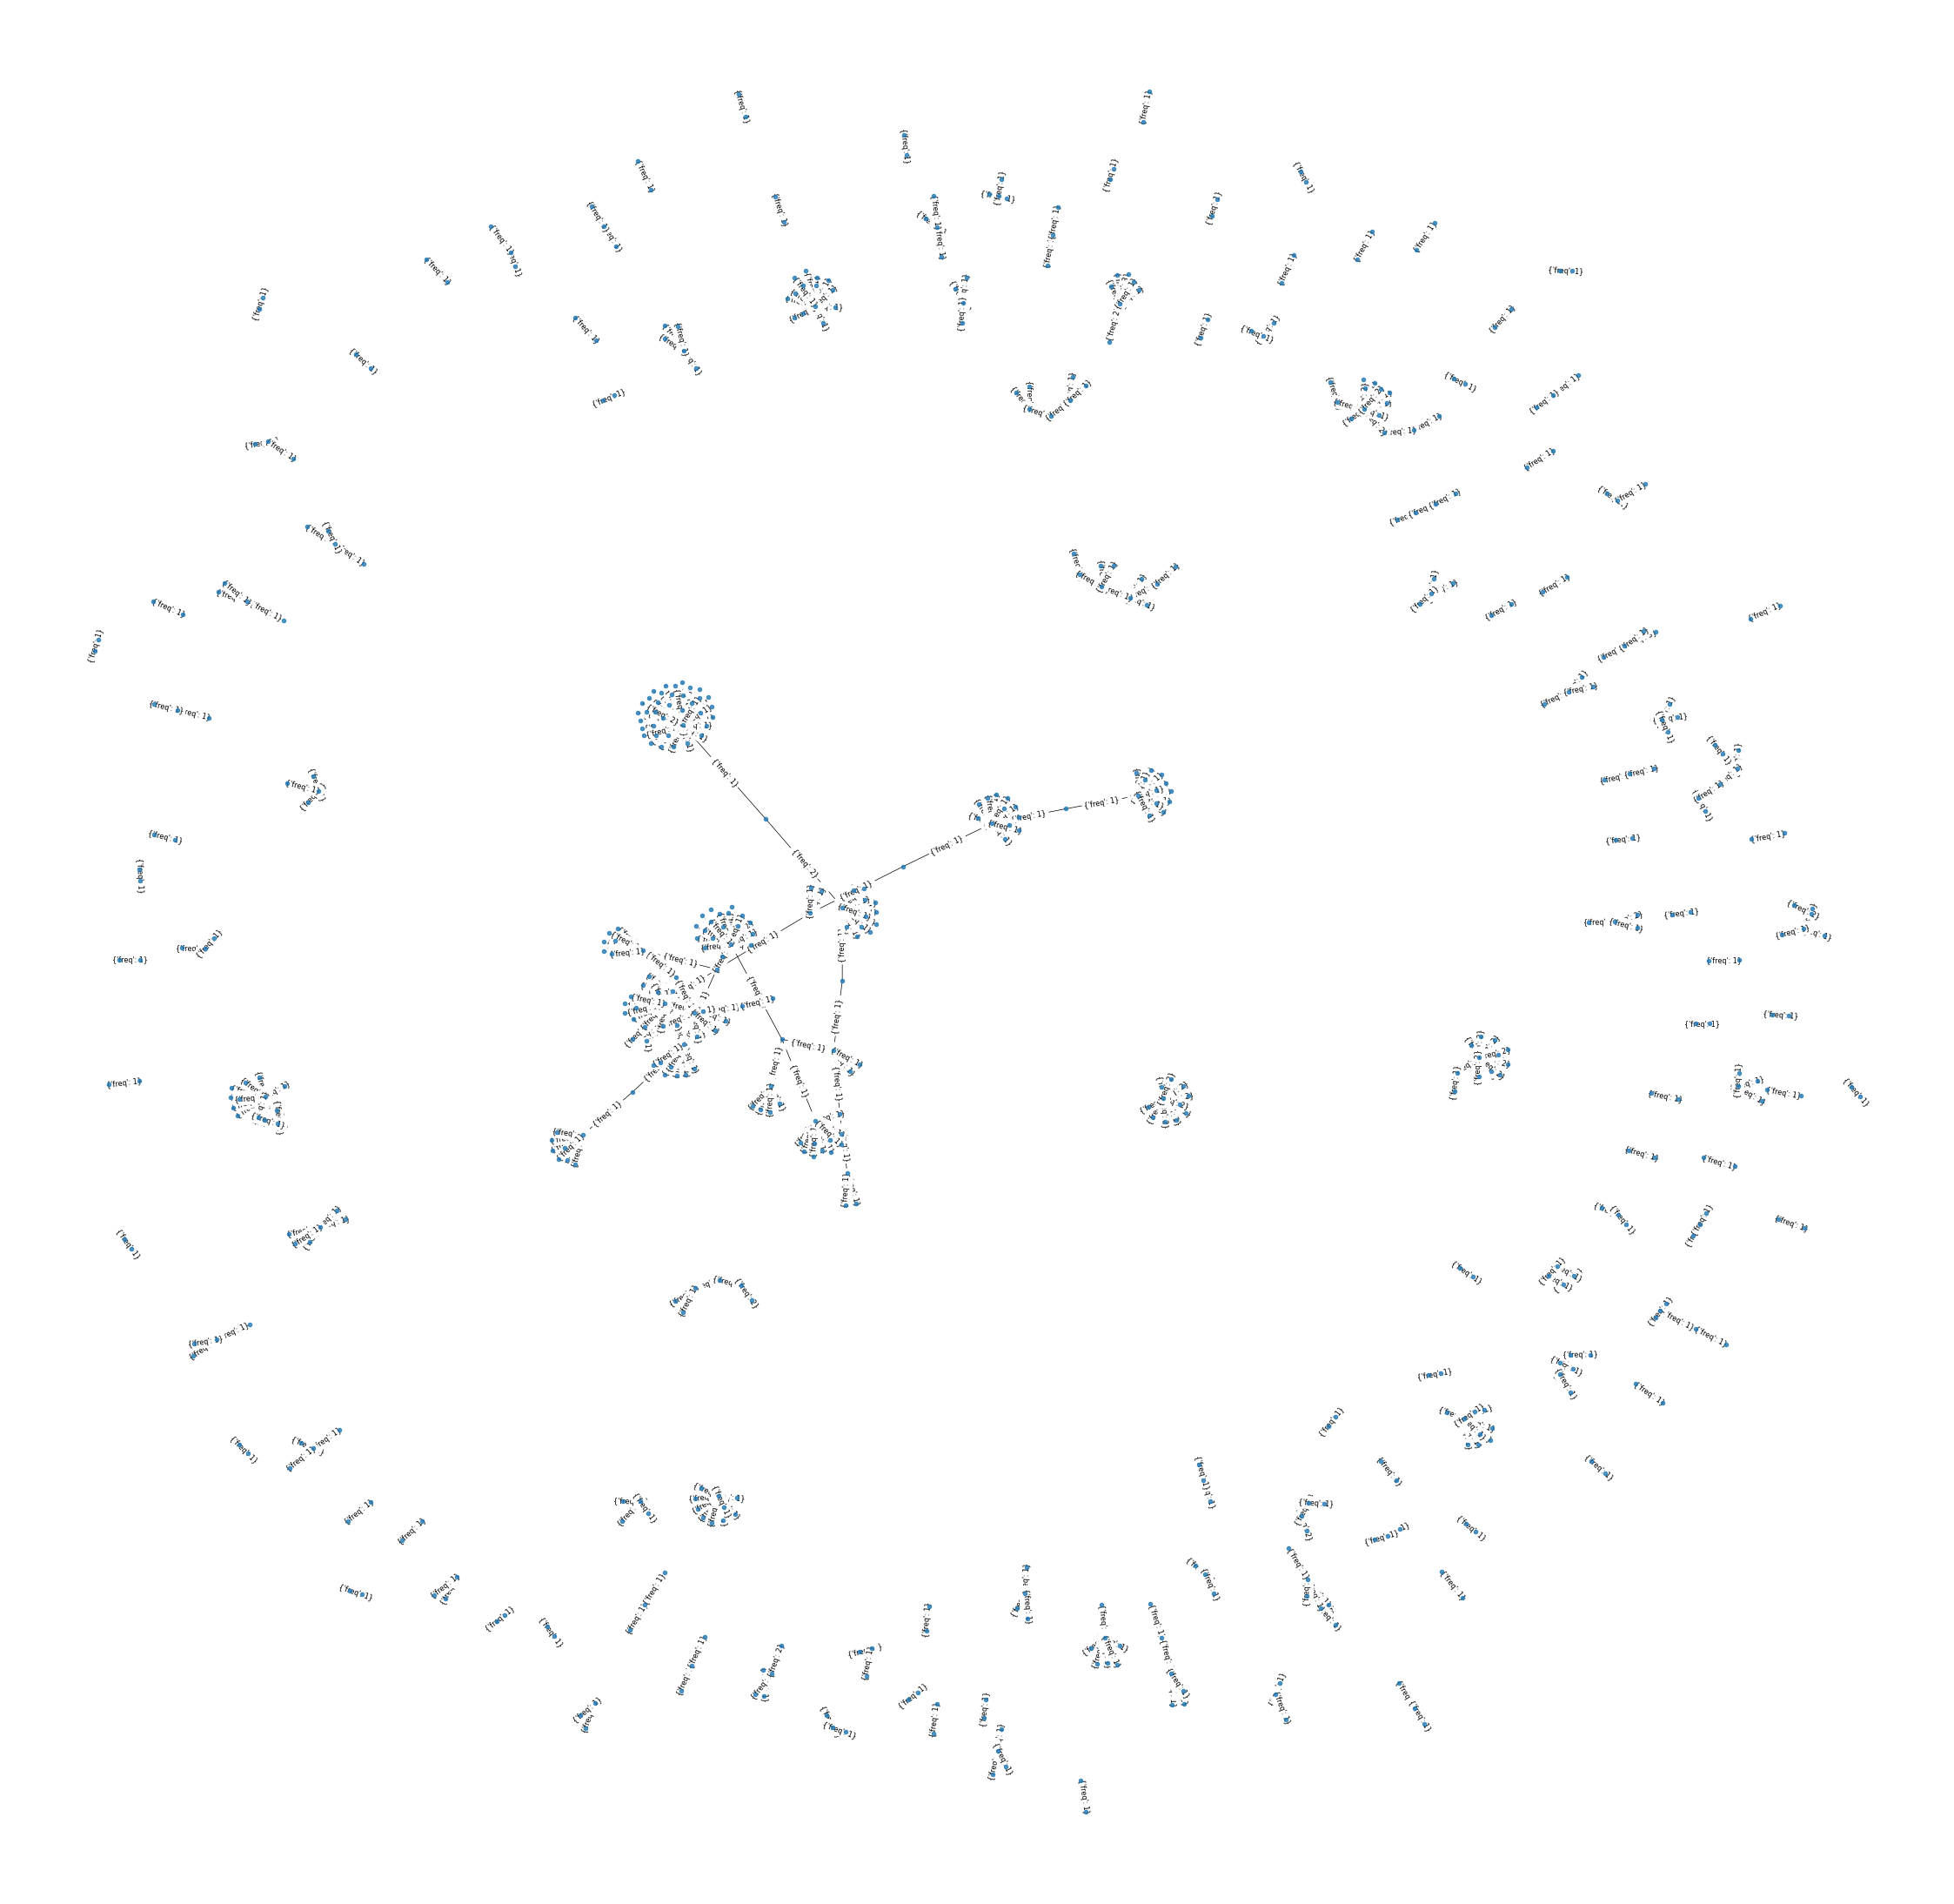

In [41]:
# Use the layout to draw the nodes and edges of your graph
layout_hash = nx.spring_layout(g_tw_hash)
plt.figure(figsize = (40,40))
plt.axis('off')
nx.draw_networkx_nodes(g_tw_hash, pos = layout_hash, node_size=20, alpha=0.8)
nx.draw_networkx_edges(g_tw_hash, pos = layout_hash, width = 0.7, edge_color='black')
edge_labels = nx.get_edge_attributes(g_tw_hash, 'freq')
nx.draw_networkx_edge_labels(g_tw_hash, pos = layout_hash, font_size=8)

plt.show()